In [2]:
import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

import seaborn as sns
import datetime

## Clean Outfielder Datasets

In [ ]:
#dfoutf1 (Outfielders who played btwn 30 to 100 gms) = clutch_outf_30.csv
#dfoutf2 (Outfielders who played at least 100 gms) = clutch_outf_100.csv
#dfoutf3 (Outfielders who made atleast 5 allstar gms) = allstr_clutch_outf.csv

## Data Ingestion

In [2]:
import psycopg2 as p2
conn = p2.connect(database = 'player_stats', user ='baseball_master', password = 'georgetowndata', 
                  host = 'georgetown-baseball.cnfqonxqdbry.us-east-1.rds.amazonaws.com', 
                  port = '5432')

## Data sets created

In [12]:
#dfoutf1 = pd.read_csv('clutch_outf_30.csv', index_col=0)
dfoutf2 = pd.read_csv('clutch_outf_100.csv', index_col=0)
#dfoutf3 = pd.read_csv('allstr_clutch_outf.csv', index_col=0)

In [13]:
#Clear data set of NaN values
#dfoutf = dfoutf1.fillna(0)
#dfoutf2 = dfoutf2.fillna(0)
#dfoutf3 = dfoutf3.fillna(0)

In [15]:
#dfoutf1.head()
#dfoutf2.head()
dfoutf3.head()

yearID   playerID  event_count  average_win_change  clutch_win_change POS  \
0  1950.0  ashburi01        653.0            0.011982          -0.014441  OF   
1  1950.0  dimagdo01        615.0            0.010802          -0.009664  OF   
2  1950.0  dimagjo01        580.0            0.015860          -0.018902  OF   
3  1950.0   dobyla01        624.0            0.017617          -0.020485  OF   
4  1950.0  kinerra01        569.0            0.022151          -0.010648  OF   

     G_x nameFirst  nameLast  birthYear    ...          R    HR    RBI  \
0  147.0    Richie   Ashburn     1927.0    ...       84.0   2.0   41.0   
1  140.0       Dom  DiMaggio     1917.0    ...      131.0   7.0   70.0   
2  137.0       Joe  DiMaggio     1914.0    ...      114.0  32.0  122.0   
3  140.0     Larry      Doby     1923.0    ...      110.0  25.0  102.0   
4  150.0     Ralph     Kiner     1922.0    ...      112.0  47.0  118.0   

        AVG     1B     TB       SLG       OBP       OPS         RC  
0  0.303030  141.0  191.0  0.321549  0.371775  0.693324  71.009105  
1  0.328231  152.0  212.0  0.360544  0.413947  0.774491  87.756677  
2  0.300952  115.0  181.0  0.344762  0.394389  0.739151  71.384488  
3  0.326044  134.0  184.0  0.365805  0.441516  0.807321  81.238880  
4  0.272395  122.0  164.0  0.299817  0.407738  0.707555  66.869048  

[5 rows x 28 columns]

## Outfielder's impact on game win expectancy

##### *event_count = The amount of opportunites a player has had to impact win probability
##### *average_win_change = Average for the whole year of the when a player has changed win probalibilty
##### *clutch_win_change = Average for the whole year when player has impacted win probalility when it was 50/50 late in game

## Data Exploration with Seaborn  

#### Leverage Pairplots to id trends in the data

In [14]:
import seaborn as sns
import numpy as np
%matplotlib inline

#### Measure relationship btwn impact on win expectancy and runs created.
#### Does favaroble impact of win expectancy also translate int more runs created by the player?

### Outfielders who played at least 30 games

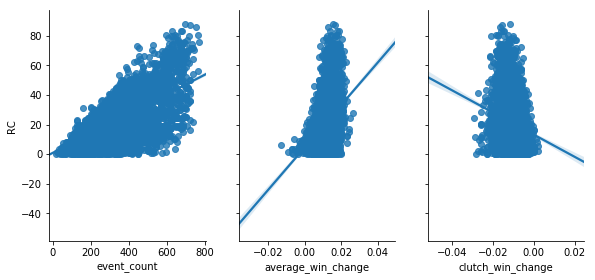

In [6]:
sns.pairplot(dfoutf1, x_vars = ['event_count','average_win_change','clutch_win_change'], y_vars = 'RC', height = 4, aspect = 0.7, kind = 'reg')

### Outfielders who played at least 100 games

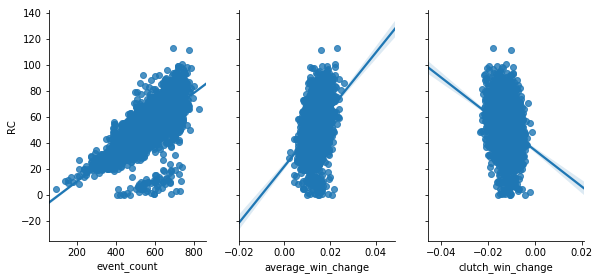

In [10]:
sns.pairplot(dfoutf2, x_vars = ['event_count','average_win_change','clutch_win_change'], y_vars = 'RC', height = 4, aspect = 0.7, kind = 'reg')

### All Star Infielders

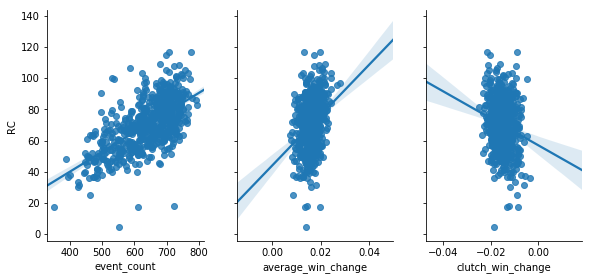

In [16]:
sns.pairplot(dfoutf3, x_vars = ['event_count','average_win_change','clutch_win_change'], y_vars = 'RC', height = 4, aspect = 0.7, kind = 'reg')

## Pairplots to view Win Expentancy  vs other features

### Outfielders who played at least 30 games

In [18]:
Outf30_Stats_1 = dfoutf1[['event_count','average_win_change','clutch_win_change',
                       'AVG','HR','1B','2B','3B']]
Outf30_Stats_1.to_csv('Outf30_Stats_1.csv')

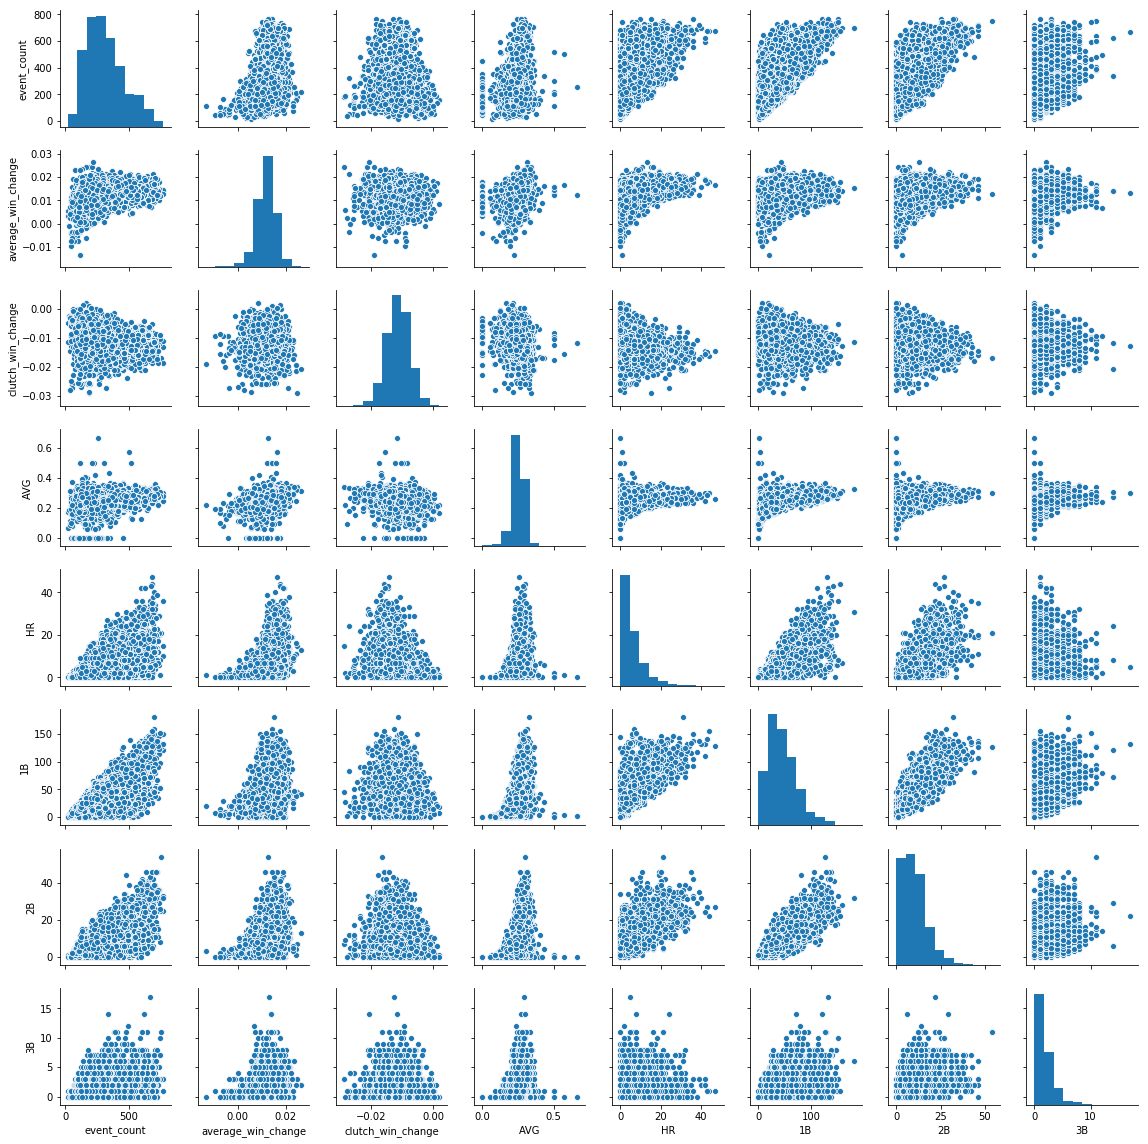

In [19]:
sns.pairplot(Outf30_Stats_1, height= 2)

In [20]:
Outf30_Stats_2 = dfoutf1[['event_count','average_win_change','clutch_win_change',
                       'TB','SLG','OPS','OBP','BB']]
Outf30_Stats_2.to_csv('Outf30_Stats_2.csv')

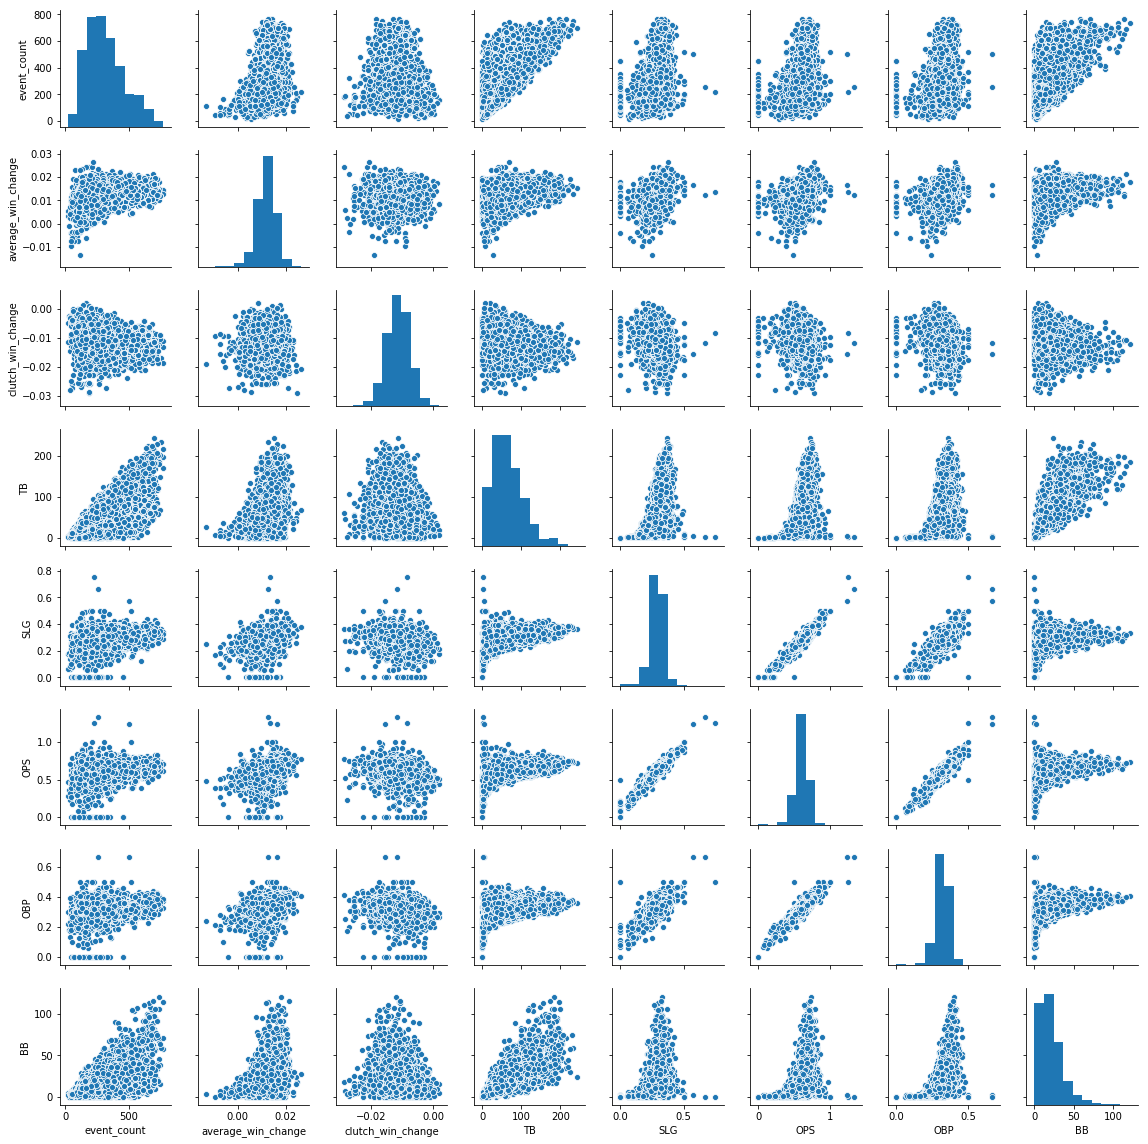

In [21]:
sns.pairplot(Outf30_Stats_2, height= 2)

### Win Expentancy impact on Runs Created

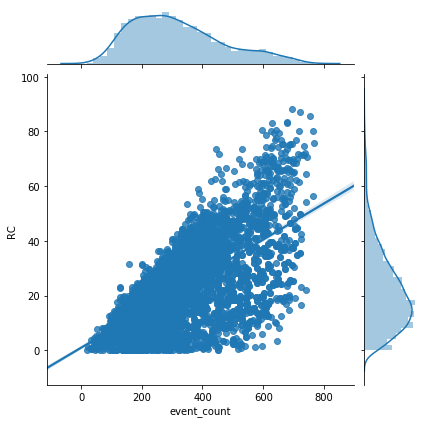

In [22]:
g = sns.jointplot("event_count", "RC", data=dfoutf1, kind="reg") 

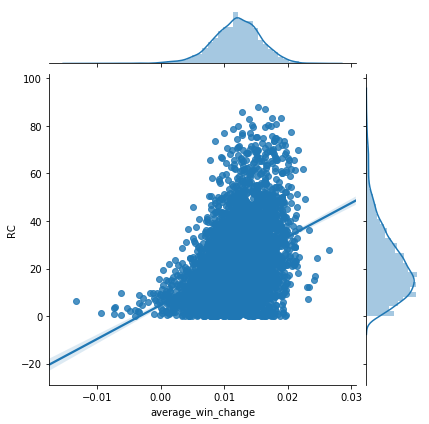

In [5]:
g = sns.jointplot("average_win_change", "RC", data=dfoutf1, kind="reg") 

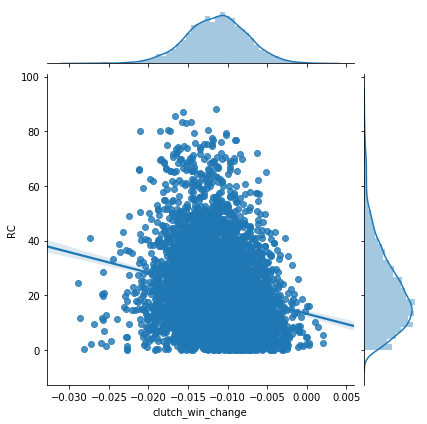

In [24]:
g = sns.jointplot("clutch_win_change", "RC", data=dfoutf1, kind="reg") 

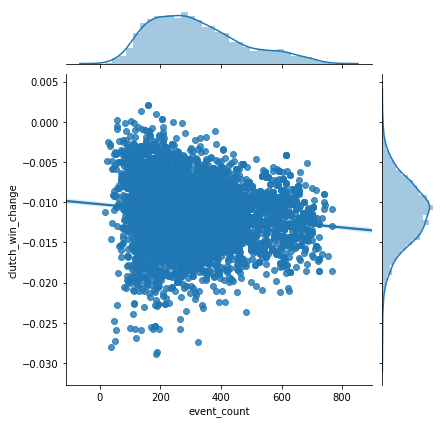

In [23]:
g = sns.jointplot( "event_count","clutch_win_change", data=dfoutf1, kind="reg")

### Outfielders who played at least 100 games

In [25]:
Outf100_Stats_1 = dfoutf2[['event_count','average_win_change','clutch_win_change',
                       'AVG','HR','1B','2B','3B']]
Outf100_Stats_1.to_csv('Outf100_Stats_1.csv')

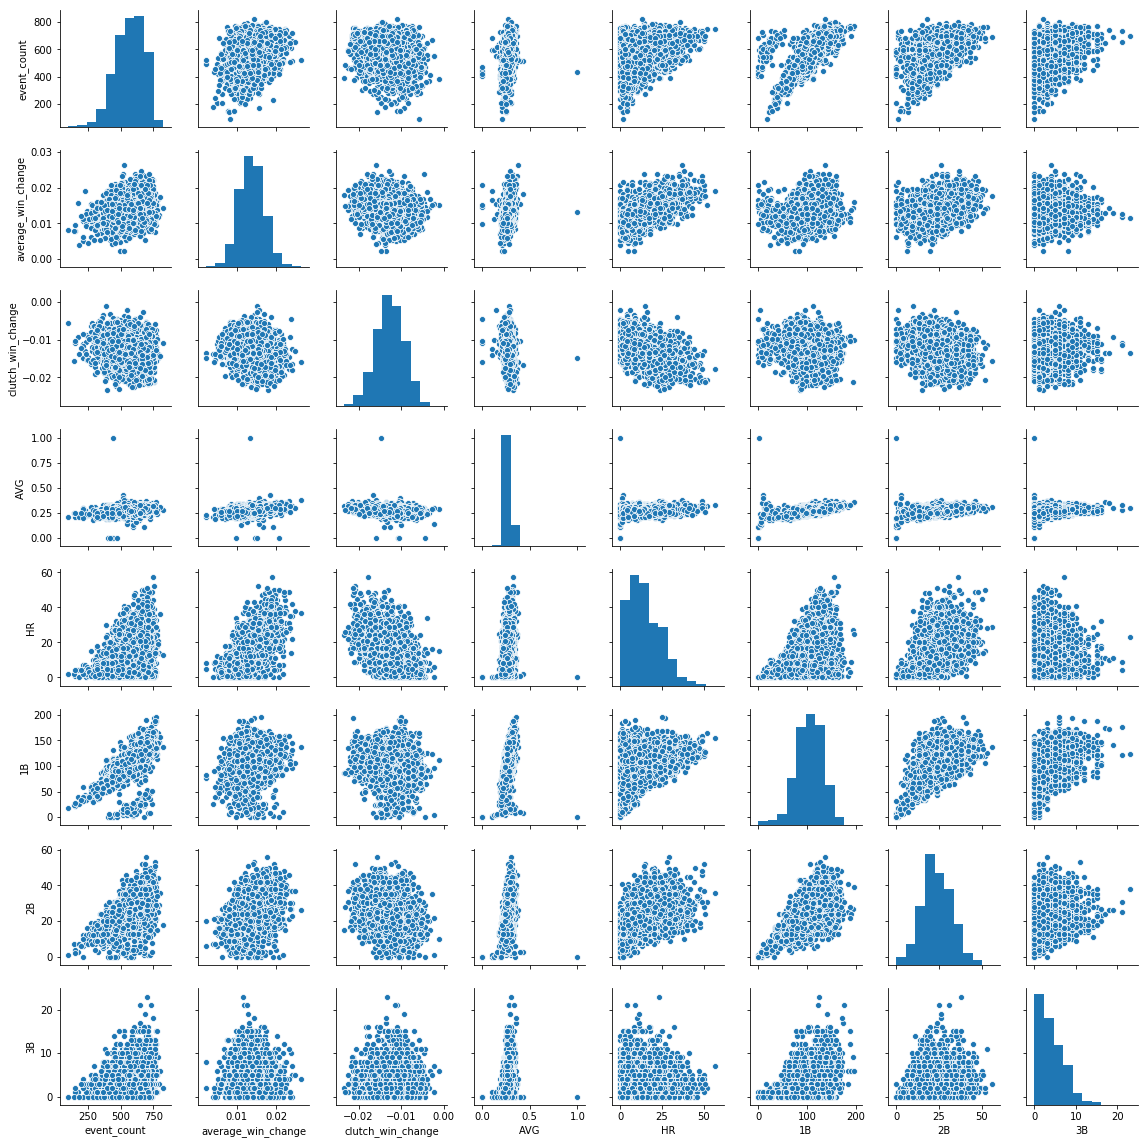

In [26]:
sns.pairplot(Outf100_Stats_1, height= 2)

In [27]:
Outf100_Stats_2 = dfoutf2[['event_count','average_win_change','clutch_win_change',
                       'TB','SLG','OPS','OBP','BB']]
Outf100_Stats_2.to_csv('Outf100_Stats_2.csv')

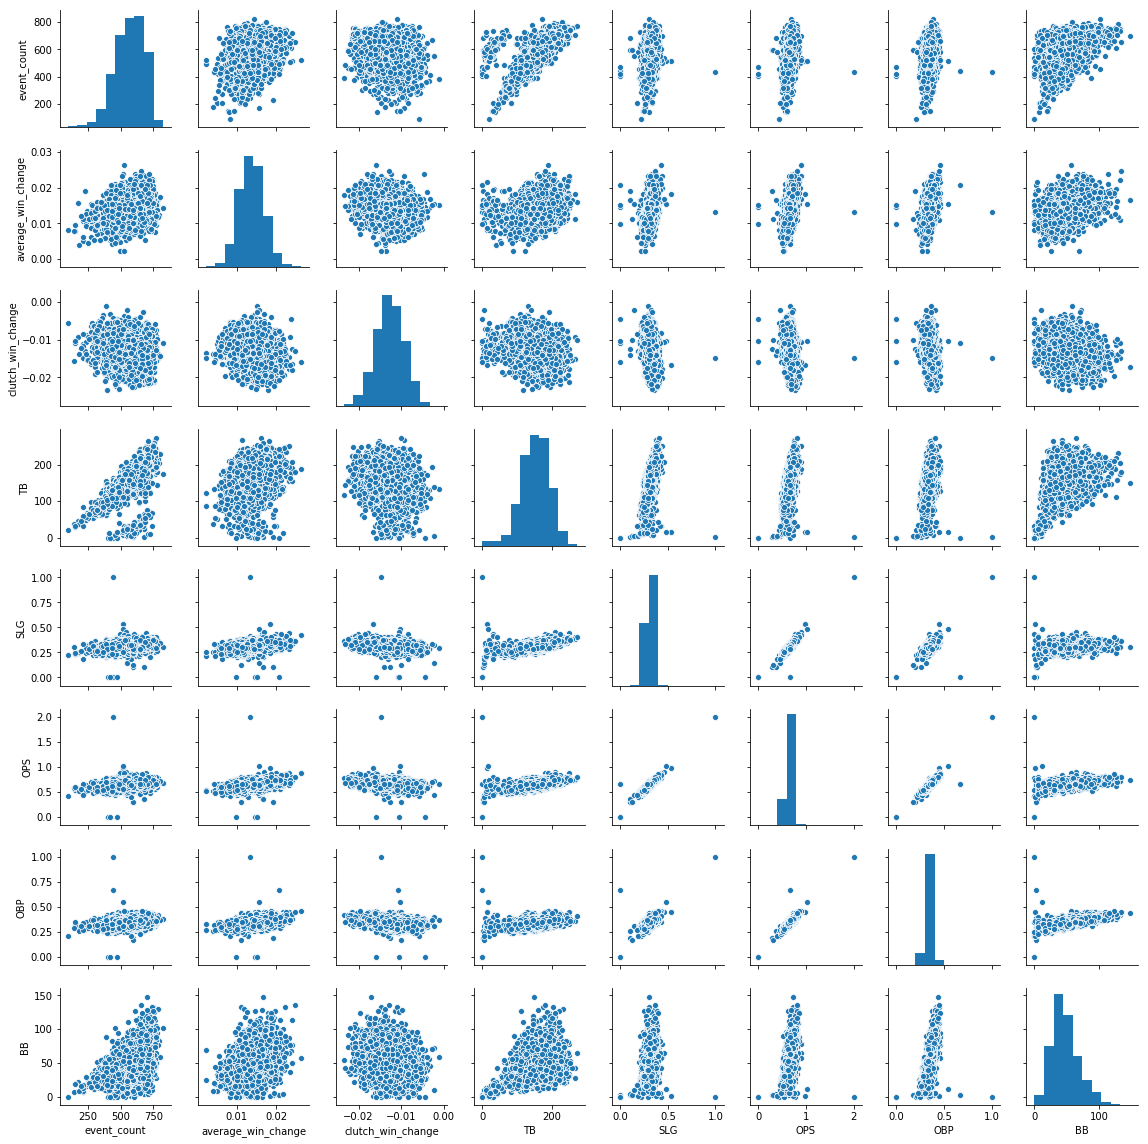

In [29]:
sns.pairplot(Outf100_Stats_2, height= 2)

### Win Expentancy impact on Runs Created

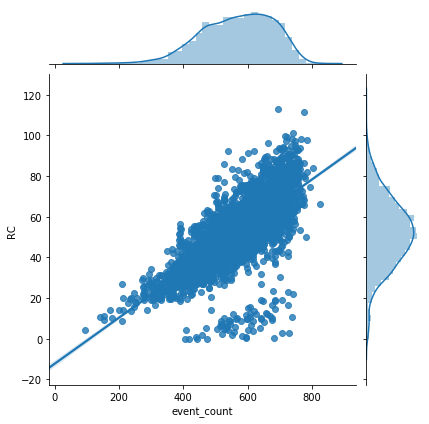

In [30]:
g = sns.jointplot("event_count", "RC", data=dfoutf2, kind="reg") 

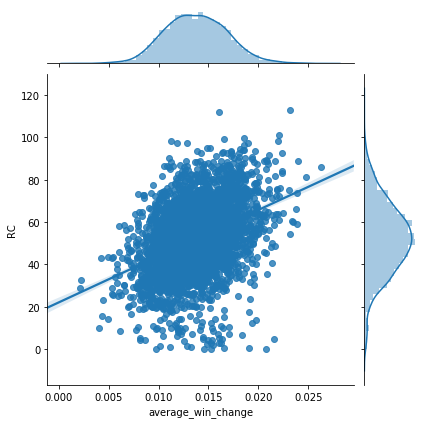

In [31]:
g = sns.jointplot("average_win_change", "RC", data=dfoutf2, kind="reg") 

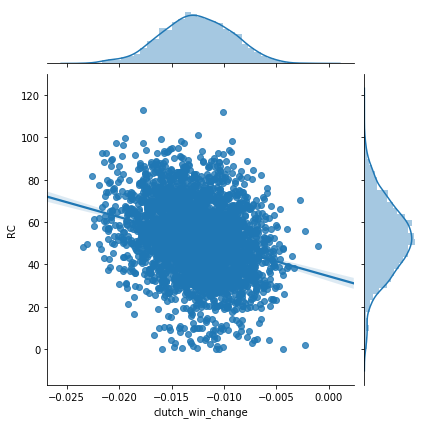

In [32]:
g = sns.jointplot("clutch_win_change", "RC", data=dfoutf2, kind="reg") 

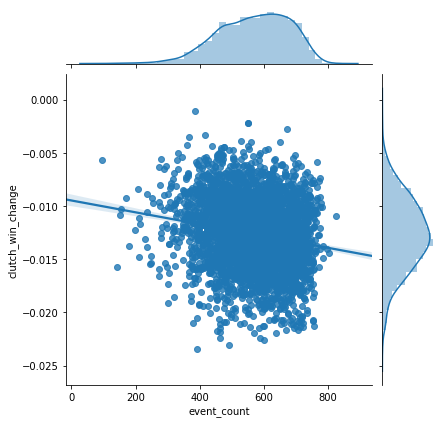

In [22]:
g = sns.jointplot( "event_count","clutch_win_change", data=dfoutf2, kind="reg")

### All Star Outfielders

In [33]:
Outf_Allstr_Stats_1 = dfoutf3[['event_count','average_win_change','clutch_win_change',
                       'AVG','HR','1B','2B','3B']]
Outf_Allstr_Stats_1.to_csv('Outf1_Allstr_Stats_1.csv')

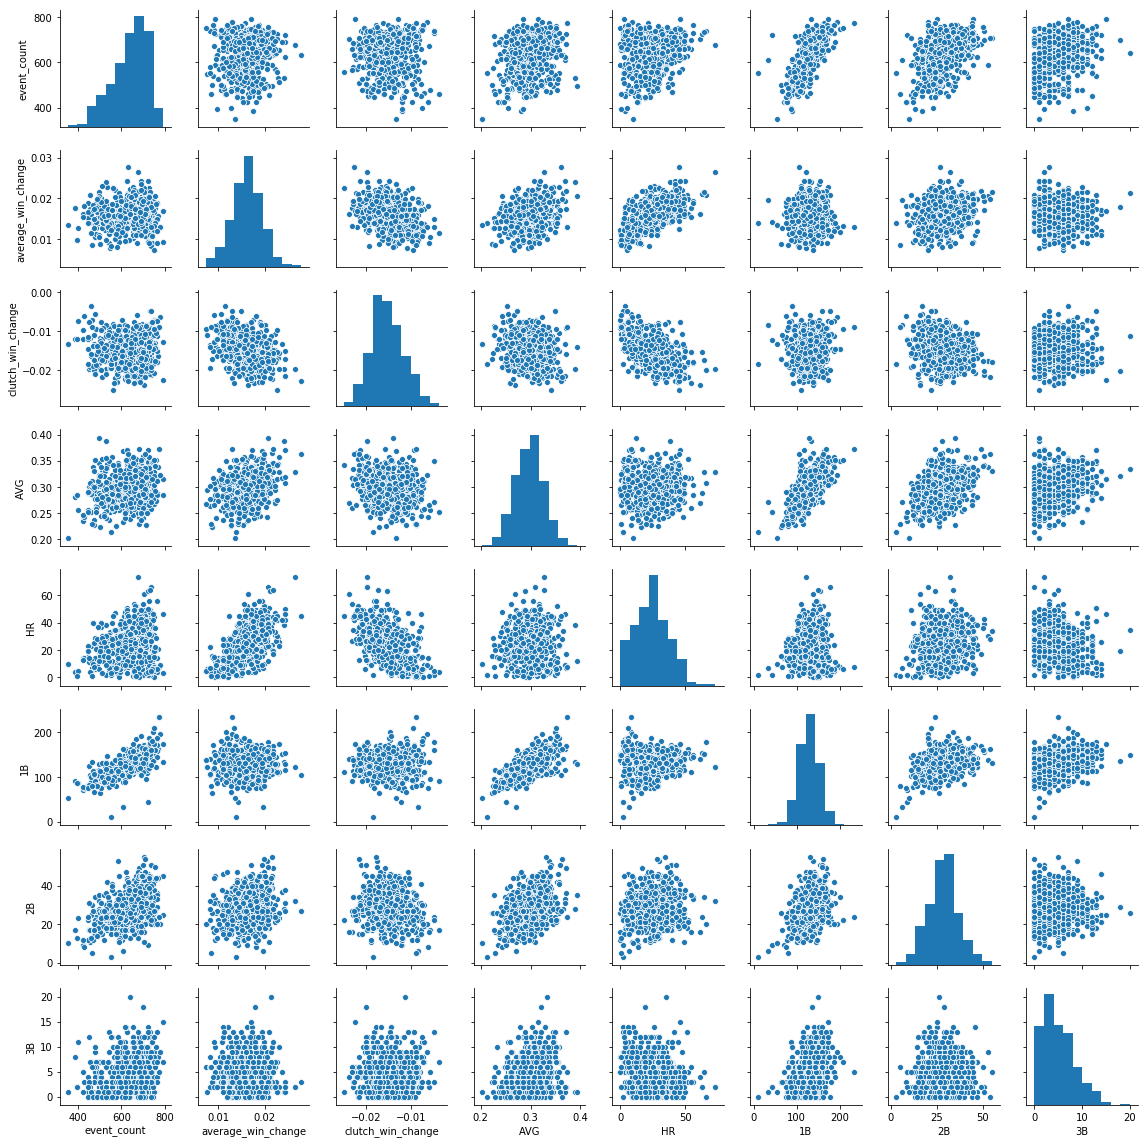

In [34]:
sns.pairplot(Outf_Allstr_Stats_1, height= 2)

In [9]:
Outf_Allstr_Stats_2 = dfoutf3[['event_count','average_win_change','clutch_win_change',
                       'TB','SLG','OPS','OBP','BB']]
Outf_Allstr_Stats_2.to_csv('Outf_Allstr_Stats_2.csv')

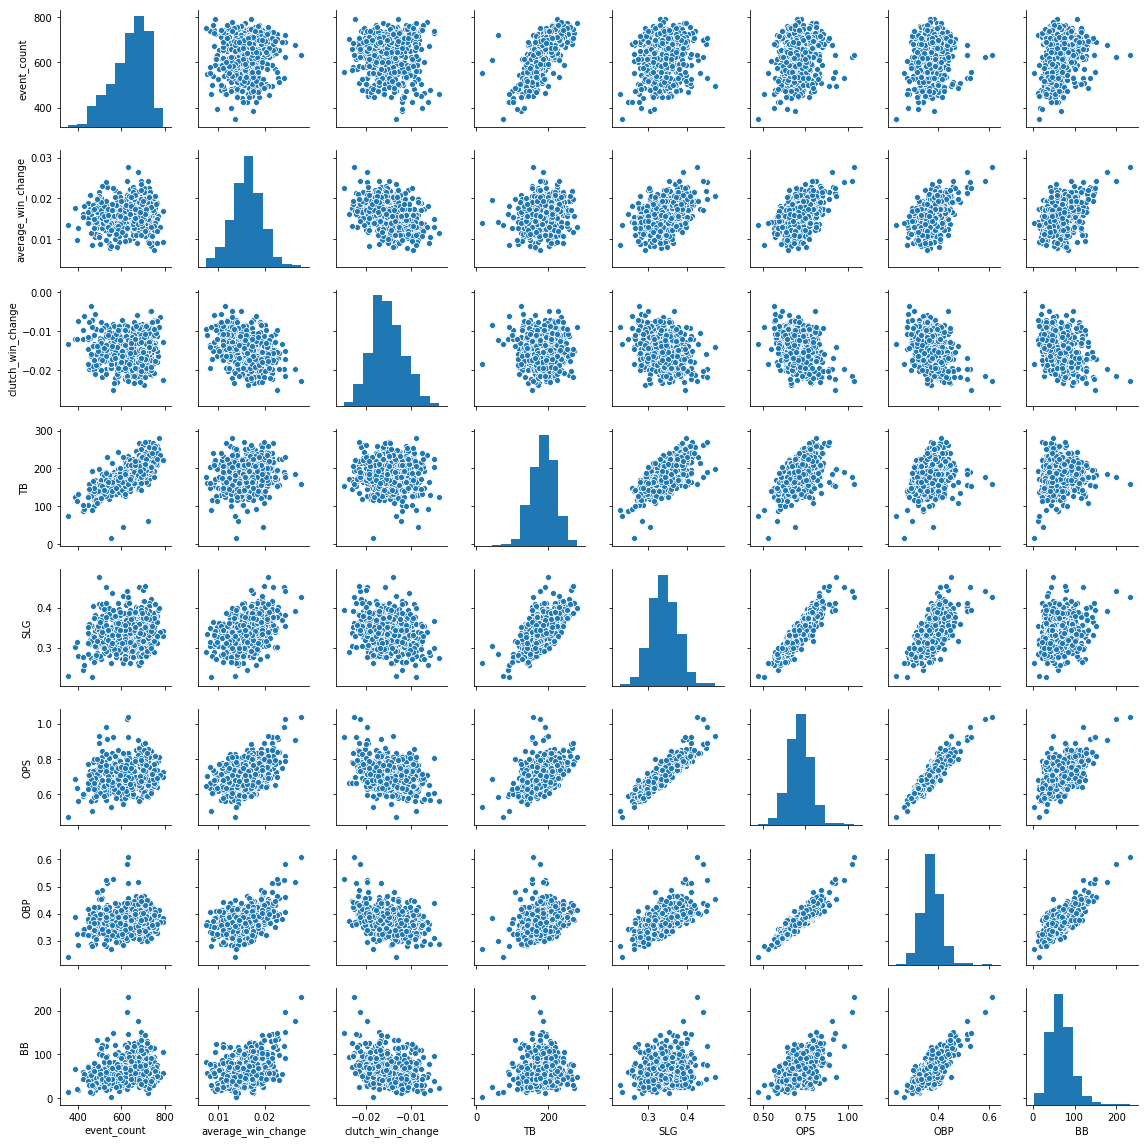

In [36]:
sns.pairplot(Outf_Allstr_Stats_2, height= 2)

### Win Expentancy impact on Runs Created

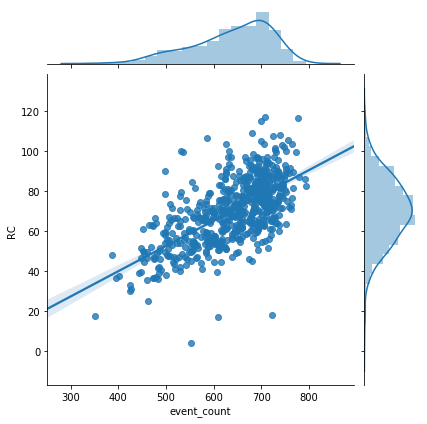

In [37]:
g = sns.jointplot("event_count", "RC", data=dfoutf3, kind="reg") 

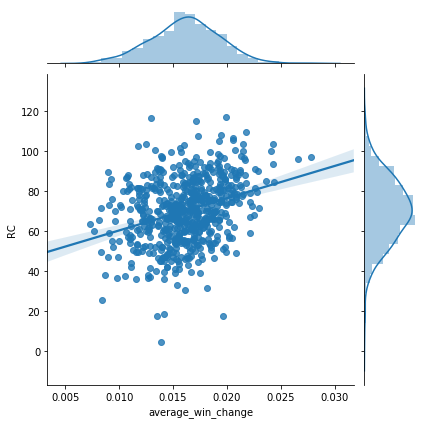

In [38]:
g = sns.jointplot("average_win_change", "RC", data=dfoutf3, kind="reg") 

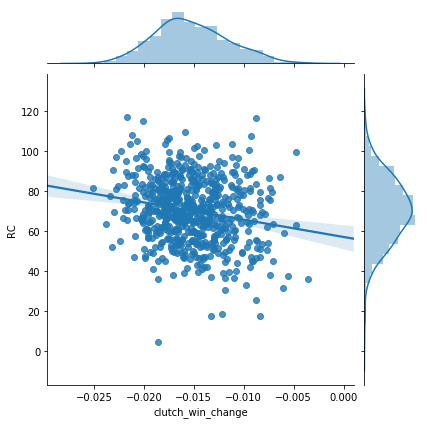

In [19]:
g = sns.jointplot( "clutch_win_change","RC", data=dfoutf3, kind="reg") 

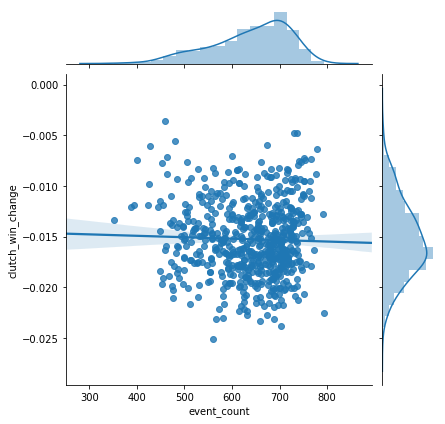

In [21]:
g = sns.jointplot( "event_count","clutch_win_change", data=dfoutf3, kind="reg") 

## Machine Learning: Can impact on win expectancy predict Runs Created (response)? 

### Outfielders who played at least 30 games

#### Create X = features and y = response

In [41]:
#What are the features? - AVG, HR, OPS, SLG, BB, 1B, 2B, 3B, H
#What is the response? - Runs Created

features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfoutf1[features]
y = dfoutf1['RC']

#### Splitting X and y into training and testing sets

In [42]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [43]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4245, 9)
(1416, 9)
(4245,)
(1416,)


#### Linear Regression to train Model to learn

In [44]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
### Interpreting model coefficents

#### Making Predictions

In [46]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [47]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [48]:
#Outfielders with at least 30 gms
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.8833705585814802


In [ ]:
#dfout1 = 1.88  with all 10 features (Catchers with atleast 30 gms)

### Outfielders who played at least 100 games

#### Create X = features and y = response

In [49]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfoutf2[features]
y = dfoutf2['RC']

#### Splitting X and y into training and testing sets

In [50]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [51]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2545, 9)
(849, 9)
(2545,)
(849,)


#### Linear Regression to train Model to learn

In [52]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Making Predictions

In [53]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [54]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [55]:
#Catchers with atleast 100 games
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.4140524091644724


### All Star Outfielders

#### Create X = features and y = response

In [57]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)

X = dfoutf3[features]
y = dfoutf3['RC']

#### Splitting X and y into training and testing sets

In [58]:
#Evaluate the Models
#from sklearn.cross.validation import train_test_split (Doesnt work)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4 )

In [59]:
#default split is 75% for training and 25% for test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(468, 9)
(156, 9)
(468,)
(156,)


#### Linear Regression to train Model to learn

In [60]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate
linreg = LinearRegression()

#fit the model to the training data(learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Making Predictions

In [61]:
#make predictions on the X test data
y_pred = linreg.predict(X_test)

In [62]:
from sklearn import metrics

#### Root-Mean Sample Squared Error (Difference btwn Predicted and Test values)

In [63]:
#All Star Outfielders.
#Computing the RMSE for Runs Created
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3538938833662548


## Feature selection - Which are the underperforming features?

### Outfielders with atleast 30 games

#### Yellowbrick's Feature Rank Visualizer

In [64]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfoutf1[features]
y = ['RC']

In [65]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: U

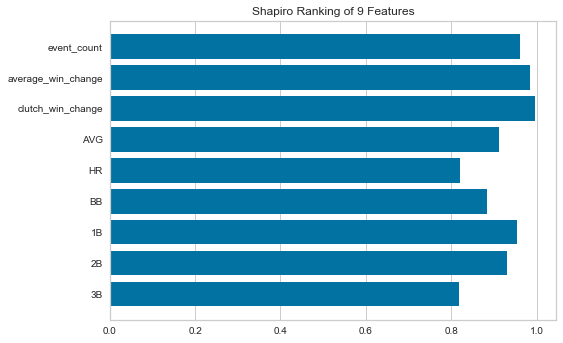

In [66]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

In [ ]:
# Features [HR, 3B, BB, AVG] ranked the worst

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [67]:
#Outfielders with atleast 30 games
#convert y from float to integer
y = dfoutf1.RC.astype(int) 

In [68]:
#Outfielders with atleast 30 games
#set X value for all 10 features
X = dfoutf1[features]

In [69]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [70]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

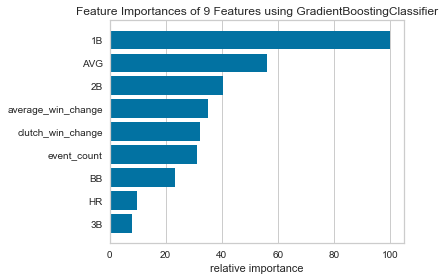

In [71]:
# Outfielders with atleast 30 gms
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [72]:
#reset value of y to y = dfoutf1['RC']
y = dfoutf1['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


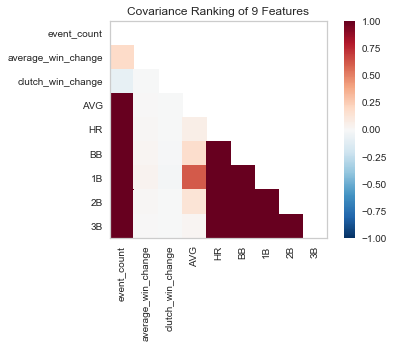

In [73]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

### Outfielders with atleast 100 games

#### Yellowbrick's Feature Rank Visualizer

In [74]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
#response = 'RC' (Runs Created)
X = dfoutf2[features]
y = ['RC']

In [75]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


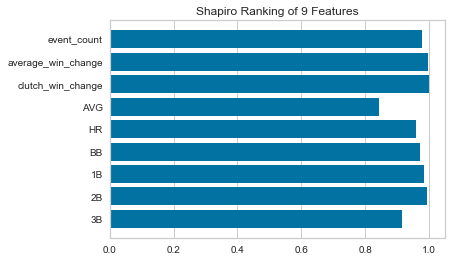

In [76]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [14]:
#Infielders with atleast 100 games
#convert y from float to integer
y = dfoutf2.RC.astype(int) 

In [82]:
X = dfoutf2[features]

In [83]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [84]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

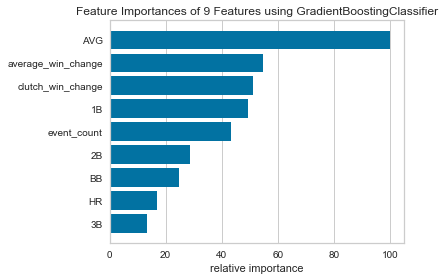

In [85]:
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [86]:
#reset value of y to y = dfoutf2['RC']
y = dfoutf2['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


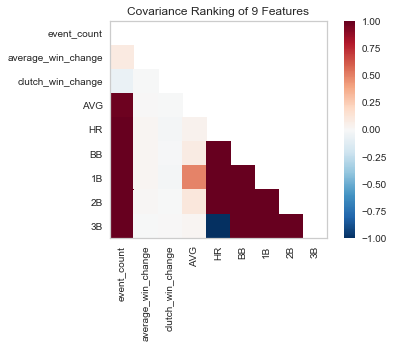

In [87]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

### Allstar Outfielders

#### Yellowbrick's Feature Rank Visualizer

In [88]:
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
X = dfoutf3[features]
y = ['RC']

In [89]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(features = features, algorithm ='shapiro')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


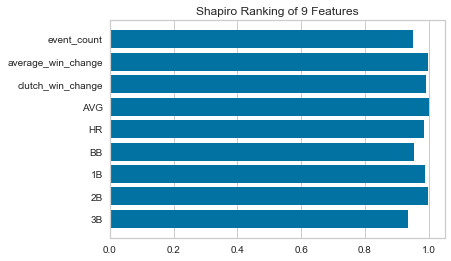

In [90]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

#### Yellowbrick's Feature Importance to futher verify Feature Importance

In [91]:
#convert y from float to integer
y = dfoutf3.RC.astype(int) 

In [92]:
X = dfoutf3[features]

In [93]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features.importances import FeatureImportances
%matplotlib inline

In [94]:
fig = plt.figure()
ax = fig.add_subplot()
#ax = ax

<Figure size 432x288 with 0 Axes>

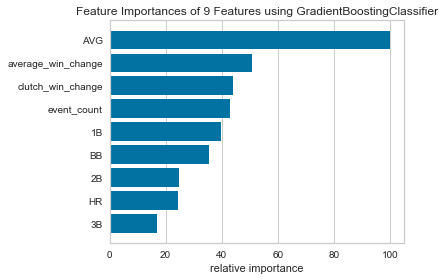

In [95]:
# Features TB, OBP, and OPS are the most important
viz = FeatureImportances(GradientBoostingClassifier(), ax = ax)
viz.fit(X,y)
viz.poof()

#### Yellowbrick's Feature Covariance 2D Rank heat map

In [96]:
#reset value of y to y = dfoutf3['RC']
y = dfoutf3['RC']
from yellowbrick.features import Rank2D
visualizer = Rank2D(features=features, algorithm = 'covariance')

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


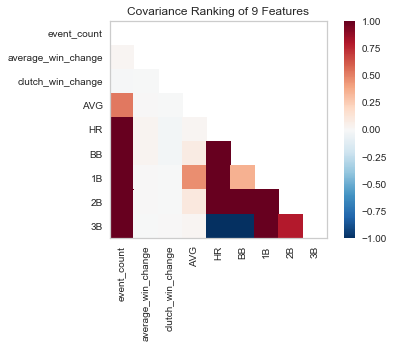

In [97]:
visualizer.fit(X,y)
visualizer.transform(X)
visualizer.poof()

## Prediction and Error Plotting

### Outfielders with atleast 30 games

In [98]:
#Reset X and y values
features = ['event_count','average_win_change','clutch_win_change','AVG','HR','BB','1B','2B','3B']
X = dfoutf1[features]
y = dfoutf1['RC']

#### Ridge Regression - R2 Score

In [99]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [100]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.9713647018059964


In [ ]:
#score to high = overfitted. Must remove features and add noise

In [101]:
#removed TB, OPS, OBP, SLG, '2B'
features = ['event_count','average_win_change','clutch_win_change']

In [102]:
X= dfoutf1[features]

In [103]:
X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.4627855250162437


#### Lasso Regression -R2 Score

In [104]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [106]:
#Re-set X with only win expectancy features
features = ['event_count','average_win_change','clutch_win_change']
X= dfoutf1[features]
y = dfoutf1['RC']

In [107]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.4627855250162437


## Data Visualization

### Outfielders with at least 30 gms

#### Visualize Plot Error

In [108]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfoutf1
features = features = ['event_count','average_win_change','clutch_win_change']
X = dfoutf1[features]
y = dfoutf1['RC']


In [109]:
#Create the train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

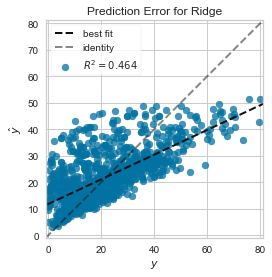

In [110]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

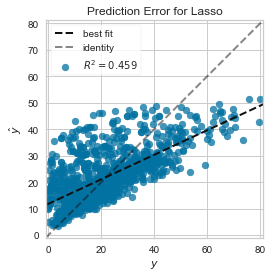

In [111]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

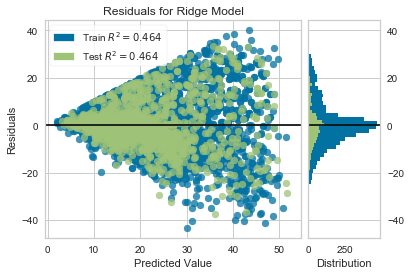

In [112]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Resdiual Plots

In [113]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

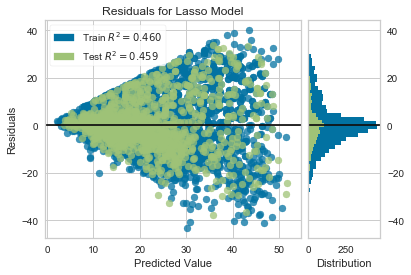

In [114]:
Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

## Prediction and Error Plotting

### Outfielders with atleast 100 games

In [116]:
#Reset X and y values
features = features = ['event_count','average_win_change','clutch_win_change']
X = dfoutf2[features]
y = dfoutf2['RC']

#### Ridge Regression -R2 Score

In [117]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [118]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.5127131145613126


#### Lasso Regression -R2 Score

In [119]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [120]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.5127131145613126


## Data Visualization

### Outfielders with at least 100 gms

#### Visualize Plot Error

In [122]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfoutf2
features = features = ['event_count','average_win_change','clutch_win_change']
X = dfoutf2[features]
y = dfoutf2['RC']

In [123]:
#Create and train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

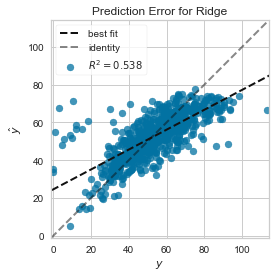

In [124]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

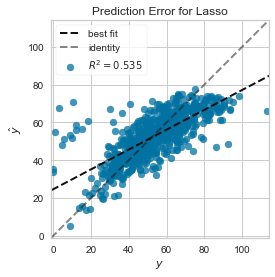

In [125]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

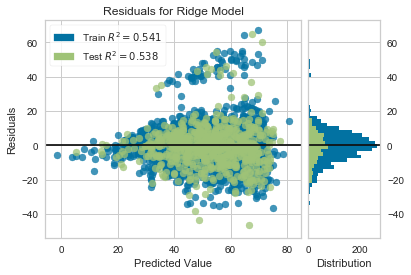

In [126]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Residual Plots

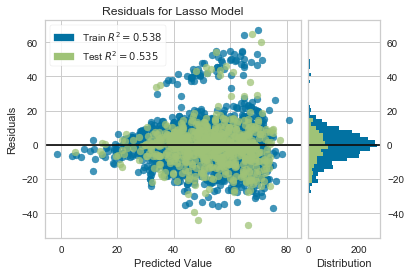

In [127]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

## Prediction and Error Plotting

### All Star Outfielders 

In [128]:
#Reset X and y values
features = ['event_count','average_win_change','clutch_win_change']
X = dfoutf3[features]
y = dfoutf3['RC']

#### Ridge Regression - R2 Score

In [129]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [130]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)

#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.49685437908296837


#### Lasso Regression -R2 Score

In [131]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score

In [132]:

X_train, X_test, y_train, y_test = tts(X,y, random_state = 4, test_size = .2)
#want to first train the model on test data because if the model memorizes the training data and then evaluates, it will overfit
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

y_hat = model.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(r2)

0.49685437908296837


## Data Visualization

### All Star Outfielders 

#### Visualize Plot Error

In [133]:
#Train Model again

from sklearn.model_selection import train_test_split
data = dfoutf3
features = ['event_count','average_win_change','clutch_win_change']
X = dfoutf3[features]
y = dfoutf3['RC']

In [134]:
#Create and train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Ridge Regression R2 Score

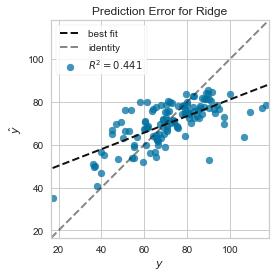

In [135]:
from sklearn.linear_model import Ridge

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Ridge = Ridge()
visualizer = PredictionError(Ridge)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Lasso Regression R2 Score

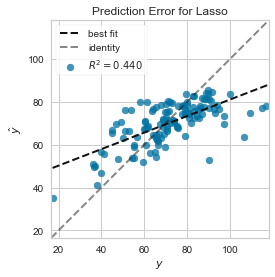

In [136]:
from sklearn.linear_model import Lasso

from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
Lasso = Lasso()
visualizer = PredictionError(Lasso)#, ##size = (1080,720), legend_size = 3))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof() 

#### Ridge - Residual Plots

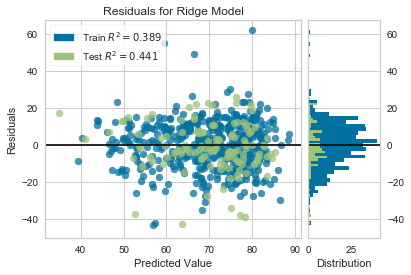

In [137]:
from sklearn.linear_model import Ridge
from yellowbrick.regressor import ResidualsPlot

Ridge = Ridge()
visualizer = ResidualsPlot(Ridge)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()
 

#### Lasso - Residual Plots

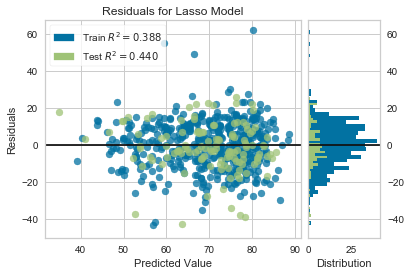

In [138]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import ResidualsPlot

Lasso = Lasso()
visualizer = ResidualsPlot(Lasso)

visualizer.fit(X_train, y_train)  # Fit the training data to the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()